# LASSO Regression In-Class Exercise

In this exercise, we will see how to use LASSO for pitch detection and noise removal in audio.

We load the following packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load the Data

The data is taken from a sample of about 20 ms of audio from a viola.  I have already pre-processed the data.  You can load it with the following command.  The value `t` is the time (in seconds) and `y` is the sample of audio (this is a mono recording).  Noise has been artificially added to the sample.

In [2]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit05_lasso/viola_sample.p'
fn_dst = 'viola_sample.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    t,y = pickle.load(fp)

File viola_sample.p is already downloaded


Plot the data `y` vs. `t`.  

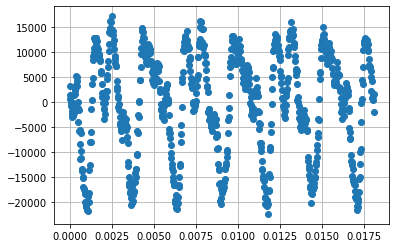

In [4]:
# TODO
plt.plot(t, y, 'o')
plt.grid(True)
plt.show()


## Creating Features for a Sinusoidal Model

We will try to fit a model of the form:

    y[i] = \sum_j a[j]*sin(2*pi*freq[j]*t[i]) + b[j]*cos(2*pi*freq[j]*t[i])

That is, `y[i]` is a sum of sinusoids.  This is a common model for audio signals since an instrument, such as a viola, produces discrete tones.  

This model is non-linear in the frequency parameters.  So, instead of trying to find the frequencies, we will fix a large number of frequencies and then require that the coefficients `a[j]` and `b[j]` are mostly sparse.  

We will use the following vector of frequencies.  This vector includes frequencies on the muscial scale as well as frequencies between the musical notes.

In [5]:
freq = 55*2**(np.arange(5*96)/96)

To fit the sinusoidal model, we will write a function to map the values `t` to 
the `sin` and `cos` features.  Finish the function `transform` that creates matrices:

    Xcos[i,j] = np.cos(2*np.pi*t[i]*freq[j])
    Xsin[i,j] = np.sin(2*np.pi*t[i]*freq[j])
    X = np.hstack((Xcos,Xsin))
    
So, if `freq` is length `d`, there will `2*d` features.  You can try to create the matrices using python broadcasting if you want to avoid a for loop.    

In [6]:
def transform(t,freq):
    # TODO
    Xcos = np.cos(2 * np.pi* t[:, None] * freq[None,:])
    Xsin = np.sin(2 * np.pi* t[:, None] * freq[None,:])
    
    X = np.hstack((Xcos,Xsin))    
    return X

Split the data `t` and `y` into training and test.  Use approximately 50% for each set.

In [8]:
from sklearn.model_selection import train_test_split

# TODO
ttr, tts, ytr, yts = train_test_split(t, y, test_size=0.3)

Transform the `ttr`, `tts` into `Xtr` and `Xts`.

In [10]:
# TODO
Xtr, Xts = transform(ttr, freq), transform(tts, freq)

## Use LASSO to Find the Frequencies

We can now use LASSO regression to find the model
* Use LASSO regression with `alpha=500` to fit the model.  
* Find the R^2-score on the test data.
* Plot the predicted value of `y` for `t in [0,0.02]`.

In [16]:
from sklearn.linear_model import Lasso

# TODO
regr = Lasso(Xtr, ytr)
regr.fit(Xtr, ytr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass fit_intercept=[-16342.04650194  12544.317376    11735.30755591 -19505.84142452
  11181.31544997 -14960.24401834  11807.73513048   7022.85124005
 -15346.14062476   2511.58760678 -11849.39001999  11074.7810351
  11281.47619918  12329.08420778  10390.57588713   -404.56480764
   7775.60237839 -15973.95935072   2931.03464717   5916.64260758
 -13632.09314505    428.47513367   5936.12501868   -840.97272489
 -15833.83584172   9944.83818754   -537.44590076  -1565.0234492
 -16889.65030047   -718.47043566  -1909.06374291  -5747.09202802
  -2005.5363136  -14735.22500942   1213.55006213   9459.21312894
   8222.94919195  -4123.01453031 -20290.62246161 -20592.36888045
   4715.17991304   8401.50080942   6277.87978053   1235.6594425
  -5742.46584638   5966.29537804  -6294.14886774  11237.26848515
   4175.92428289   4818.74268894   7799.97244309  -6997.47219364
   7668.00144765   -285.54707463   1180.35576694 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Recall that you can find the coefficient in the model via `w = regr.coef_`.  If `freq` has `d` terms, then `w` will have `2*d` terms.
* Split the coefficients `w` into `a` and `b`, the terms for the `cos` and `sin` features.
* Plot `a` and `b` using `plt.stem`.
* Which frequencies is dominant in this track?


In [15]:
# TODO
w = regr.coef_
a = w[:]
b = w[d:]

AttributeError: 'Lasso' object has no attribute 'coef_'

Still have time...
* Find the optimal `alpha` using cross-validation